In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from preprocess import *

In [3]:
train = pd.read_csv('../dataset/train.csv')

In [4]:
train = preprocess(train)
train.head()

,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,...,Phys_Act,Time_E_Dev,Body_Level,Gender_Female,Gender_Male,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
0,-0.215296,0.953859,1.153373,1,-0.756758,0.003817,2,0,0.390471,2,...,0.698599,0.139017,4,0,1,0,0,0,1,0
1,0.284723,-0.850730,0.736555,1,1.072690,-1.526807,2,0,0.390471,2,...,-1.097204,-0.378139,4,1,0,0,0,0,1,0
2,-0.681362,-1.079612,-1.389627,1,-0.750642,-1.595563,3,0,0.390471,2,...,-1.213204,0.573087,2,1,0,1,0,0,0,0
3,2.658384,-1.624563,-0.236474,1,-0.750642,-1.073901,2,0,0.390471,2,...,-1.213204,-1.094386,4,1,0,1,0,0,0,0
4,-0.281148,-1.019812,-0.141517,1,-1.557855,0.597210,2,0,-2.135597,2,...,-0.869157,2.240560,4,1,0,0,0,0,1,0


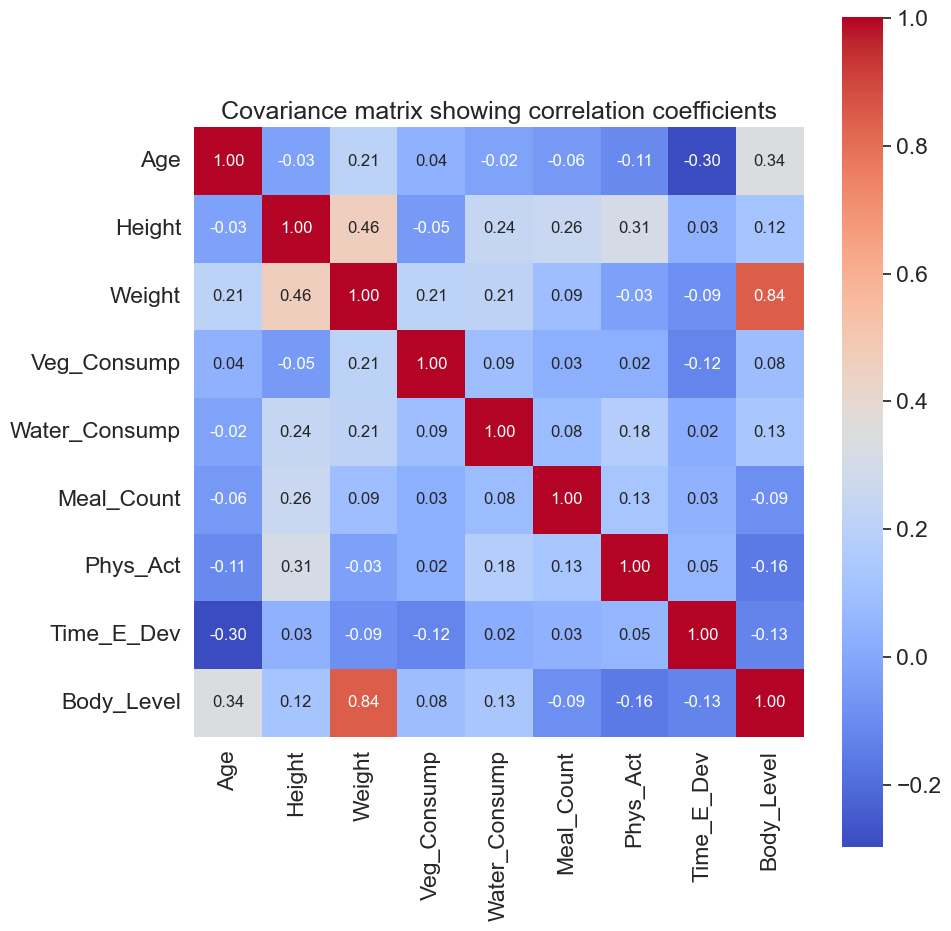

In [5]:
cols = train.select_dtypes(include=['float64']).columns.tolist()
cols.append('Body_Level')
temp_df = train.copy()
temp_df['Body_Level'] = StandardScaler().fit_transform(temp_df[['Body_Level']])
cov_mat = np.cov(temp_df[cols].values.T.astype(float))
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

In [6]:
train = remove_uncorrelated_features(train)
train.head()

,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Food_Between_Meals,Fam_Hist,...,Phys_Act,Time_E_Dev,Body_Level,Gender_Female,Gender_Male,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
0,-0.215296,0.953859,1.153373,1,-0.756758,0.003817,2,0,2,1,...,0.698599,0.139017,4,0,1,0,0,0,1,0
1,0.284723,-0.850730,0.736555,1,1.072690,-1.526807,2,0,2,1,...,-1.097204,-0.378139,4,1,0,0,0,0,1,0
2,-0.681362,-1.079612,-1.389627,1,-0.750642,-1.595563,3,0,2,0,...,-1.213204,0.573087,2,1,0,1,0,0,0,0
3,2.658384,-1.624563,-0.236474,1,-0.750642,-1.073901,2,0,2,1,...,-1.213204,-1.094386,4,1,0,1,0,0,0,0
4,-0.281148,-1.019812,-0.141517,1,-1.557855,0.597210,2,0,2,1,...,-0.869157,2.240560,4,1,0,0,0,0,1,0


In [7]:
# Save the preprocessed dataset
train.to_csv('../dataset/train_preprocessed.csv', index=False)